## Customer Service Requests Analysis

In [1]:
#import libraries 

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Import NYC 311 Request Data

In [2]:
# read csv file

NYC_df = pd.read_csv('https://github.com/Simplilearn-Edu/Data-Science-with-Python-Project-2-/blob/master/Data%20Science%20with%20Python%20Two.zip?raw=true', compression = 'zip',header=0,
    sep=',', parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')
NYC_df    

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"


In [3]:
NYC_df.head()         #information about inial rown and columns of dataframe

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
NYC_df.info()    #Information about 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300698 entries, 32310363 to 30281825
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    300698 non-null  datetime64[ns]
 1   Closed Date                     298534 non-null  datetime64[ns]
 2   Agency                          300698 non-null  object        
 3   Agency Name                     300698 non-null  object        
 4   Complaint Type                  300698 non-null  object        
 5   Descriptor                      294784 non-null  object        
 6   Location Type                   300567 non-null  object        
 7   Incident Zip                    298083 non-null  float64       
 8   Incident Address                256288 non-null  object        
 9   Street Name                     256288 non-null  object        
 10  Cross Street 1                  251419 non-null

### Covert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’
Remove null and junk data like closed date < create date , Borough = 'Unspecidfied'

In [5]:
#Prepare data
def PrepareData(df):
    NYC_df['Resolution_Time'] = (NYC_df['Closed Date'] - NYC_df['Created Date']).dt.total_seconds() ####days/3600
    df_clean = NYC_df[NYC_df['Resolution_Time'].notnull()]
    df_new = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    df_new['Day of Week'] = df_new['Created Date'].dt.dayofweek
    df_new['Day of Month'] = df_new['Created Date'].dt.day
    df_new['Month'] = df_new['Created Date'].dt.month
    df_new['Year'] = df_new['Created Date'].dt.year
    df_new=df_new[df_new.Borough!='Unspecified']
    return df_new

In [6]:
#prepare dataframe to work on

df_new = PrepareData(NYC_df)
df_new

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Resolution_Time,Day of Week,Day of Month,Month,Year
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3315.0,3,31,12,2015
32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5176.0,3,31,12,2015
32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17491.0,3,31,12,2015
32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27914.0,3,31,12,2015
32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12422.0,3,31,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,HESTER STREET,...,NaN,NaN,40.716053,-73.991378,"(40.71605290789855, -73.99137850370803)",2309.0,6,29,3,2015
30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,...,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",7231.0,6,29,3,2015
30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,...,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",11237.0,6,29,3,2015


In [7]:
df_new.shape

(298068, 57)

### Major Insight Patterns 

In [8]:
df_new['Complaint Type'].value_counts()

Blocked Driveway             76753
Illegal Parking              74314
Noise - Street/Sidewalk      48009
Noise - Commercial           35196
Derelict Vehicle             17542
Noise - Vehicle              17027
Animal Abuse                  7767
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4015
Vending                       3794
Drinking                      1272
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      422
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Squeegee                         4
Name: Complaint Type, dtype: int64

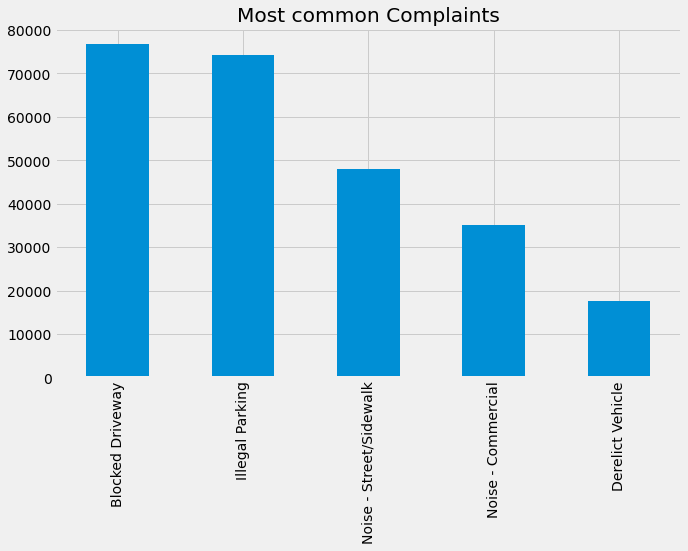

In [9]:
#Most frequent Complaints

_ = (df_new['Complaint Type'].value_counts()).head().plot(kind='bar',
                    figsize=(10,6), title = 'Most common Complaints')  

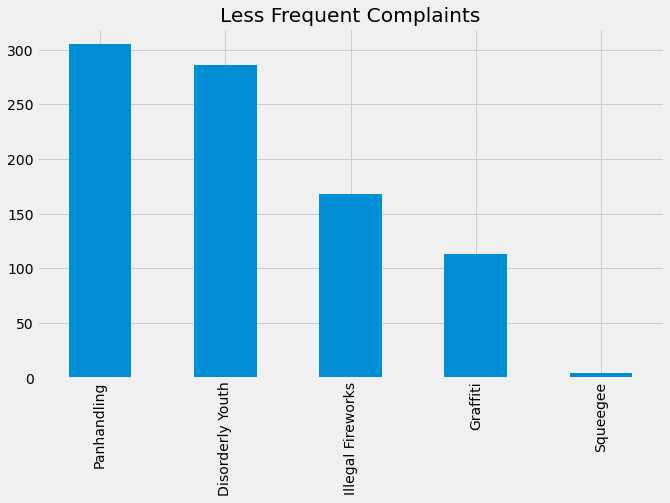

In [10]:
#least frequent complaints

_ =(df_new['Complaint Type'].value_counts()).tail().plot(kind='bar',
                    figsize=(10,6), title = 'Less Frequent Complaints')  

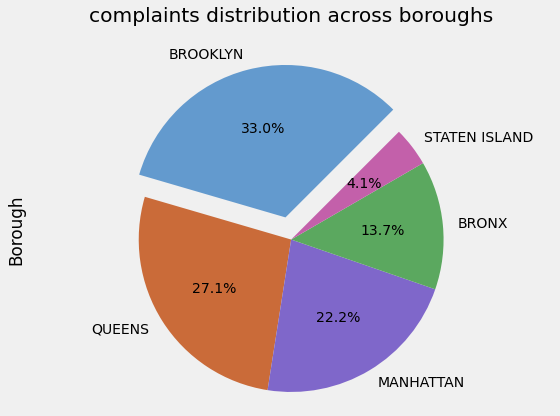

In [11]:
# complaints distribution across Boroughs
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_new['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('complaints distribution across boroughs\n')
plt.tight_layout()
plt.show()

In [12]:
#Brooklyn borough analysis which has highest number of complains

df_Brooklyn = df_new[df_new['Borough']=='BROOKLYN']

In [13]:
df_Brooklyn

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Resolution_Time,Day of Week,Day of Month,Month,Year
Unique Key,,,,,,,,,,,,,,,,,,,,,
32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,...,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",6810.0,3,31,12,2015
32308391,2015-12-31 23:53:58,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,...,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",4982.0,3,31,12,2015
32305074,2015-12-31 23:47:58,2016-01-01 08:18:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,COX PLACE,...,NaN,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",30602.0,3,31,12,2015
32310273,2015-12-31 23:44:52,2016-01-01 00:36:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,DEGRAW STREET,...,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",3068.0,3,31,12,2015
32306617,2015-12-31 23:40:59,2016-01-01 02:37:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,FLATBUSH AVENUE,...,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",10561.0,3,31,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30283933,2015-03-29 00:48:23,2015-03-29 03:42:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11238.0,799 DEAN STREET,DEAN STREET,...,NaN,NaN,40.679237,-73.963355,"(40.679237323783724, -73.96335543308066)",10450.0,6,29,3,2015
30283186,2015-03-29 00:46:26,2015-03-29 07:12:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11249.0,98A SOUTH 4 STREET,SOUTH 4 STREET,...,NaN,NaN,40.712285,-73.964001,"(40.712284534374824, -73.96400097454304)",23154.0,6,29,3,2015
30284534,2015-03-29 00:44:36,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11238.0,801 DEAN STREET,DEAN STREET,...,NaN,NaN,40.679226,-73.963309,"(40.67922632975442, -73.96330856984594)",10544.0,6,29,3,2015


In [14]:
df_Brooklyn.shape

(98295, 57)

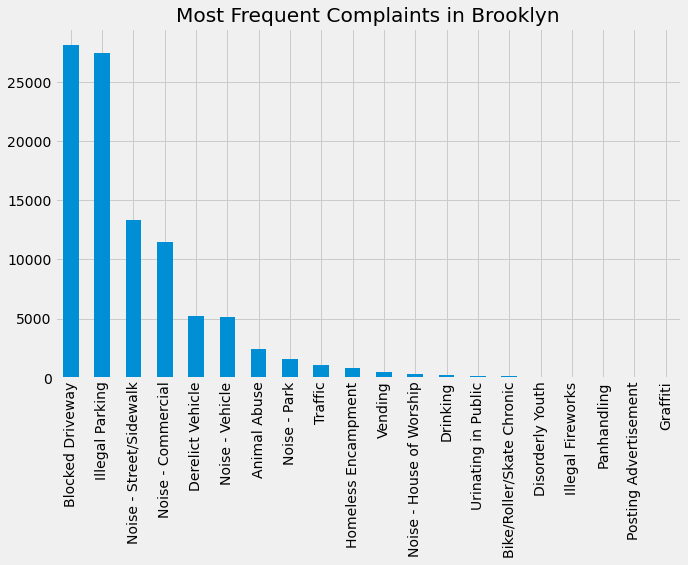

In [15]:
#bar showing most frequent complaints in Brooklyn

_ = (df_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

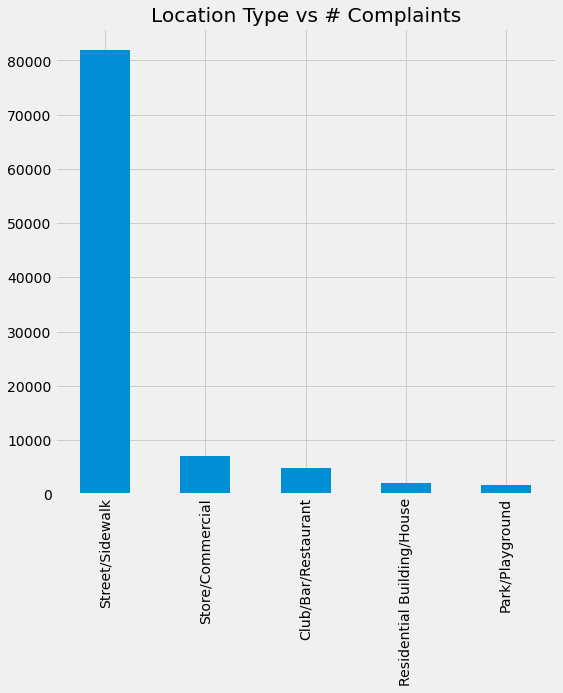

In [16]:
#location type vs complaints
_ = (df_Brooklyn['Location Type'].value_counts()).head().plot(kind='bar',
                                                    figsize=(8,8),title = 'Location Type vs # Complaints')

In [17]:
#Anlysis of Most Frequent complaint in Brooklyn

df_new[df_new['Complaint Type'] == 'Blocked Driveway']['Descriptor'].value_counts()

No Access         56786
Partial Access    19967
Name: Descriptor, dtype: int64

In [18]:
df_Brook_blocked = df_Brooklyn[df_Brooklyn['Complaint Type'] == 'Blocked Driveway']


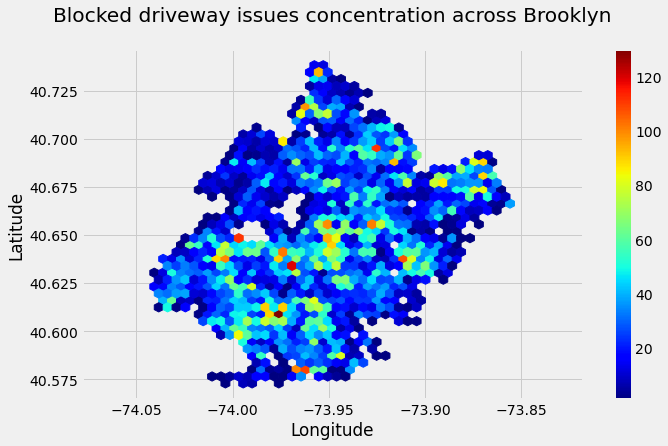

In [19]:
_ = df_Brook_blocked.plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=40,title = 'Blocked driveway issues concentration across Brooklyn\n',
    colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

### ‘Request_Closing_Time’ in Seconds, grouping them for different locations, order by complaint type

In [20]:
avg_res_time_city = df_new.groupby(['City','Complaint Type']).Resolution_Time.mean()
#df_new.sort_values('Complaint Type').groupby('City')

avg_res_time_city.head(50)

City     Complaint Type           
ARVERNE  Animal Abuse                  7753.052632
         Blocked Driveway              9093.485714
         Derelict Vehicle             10685.592593
         Disorderly Youth             12928.500000
         Drinking                       859.000000
         Graffiti                      5520.000000
         Homeless Encampment           6533.250000
         Illegal Parking               8338.913793
         Noise - Commercial            8234.000000
         Noise - House of Worship      5623.909091
         Noise - Park                  4620.000000
         Noise - Street/Sidewalk       7172.620690
         Noise - Vehicle               6695.571429
         Panhandling                   3720.000000
         Urinating in Public           2491.000000
         Vending                       1740.000000
ASTORIA  Animal Abuse                 18000.608000
         Bike/Roller/Skate Chronic     6261.533333
         Blocked Driveway             17338.024

### Average response time across complaint types in seconds

In [21]:
#Average response time in seconds across complaint types
avg_res_time = df_new.groupby('Complaint Type').Resolution_Time.mean().sort_values(ascending=True)
avg_res_time.head(25)

Complaint Type
Posting Advertisement         7112.891975
Illegal Fireworks             9940.101190
Noise - Commercial           11291.632884
Noise - House of Worship     11495.874058
Noise - Park                 12246.158157
Noise - Street/Sidewalk      12377.738882
Traffic                      12415.252002
Disorderly Youth             12810.902098
Noise - Vehicle              12918.914430
Urinating in Public          13055.991554
Bike/Roller/Skate Chronic    13523.545024
Drinking                     13879.309748
Vending                      14449.060358
Squeegee                     14564.250000
Homeless Encampment          15716.052536
Panhandling                  15741.963934
Illegal Parking              16149.479466
Blocked Driveway             17057.298659
Animal Abuse                 18768.513712
Graffiti                     25744.504425
Derelict Vehicle             26445.913579
Name: Resolution_Time, dtype: float64

 #### we can see from the above data that avaerage response time across complaint type are not equa. Hence, Null Hypothesis can be rejected. Alternate Hypothesis : Average response time across complaint type are equal

### Some complaints have resolution time very close to each other. Formimg a group for these complaints

In [24]:
df_dis_youth = df_new[df_new['Complaint Type']=='Disorderly Youth']
df_dis_youth = df_dis_youth.loc[:,['Resolution_Time']]
df_dis_youth.head()
#df_dis_youth.columns
#df_avg_res_time  = df_avg_res_time.to_frame()
#df_avg_res_time.columns()
#df_dis_youth.Complaint Type.unique()

,Resolution_Time
Unique Key,
32274507,713.0
32244468,4605.0
32225263,2345.0
32227341,19415.0
32191432,6849.0


In [26]:
df_type_res = df_new.loc[:, ['Complaint Type','Resolution_Time']]
df_type_res.head()
df_type_res.columns

Index(['Complaint Type', 'Resolution_Time'], dtype='object')

In [32]:
df_noise_veh = df_new[df_new['Complaint Type']=='Noise - Vehicle']
df_noise_veh = df_noise_veh.loc[:,['Resolution_Time']]
df_noise_veh.head()
#df_noise_veh.columns
#df_noise_veh.info()

,Resolution_Time
Unique Key,
32307159,22949.0
32308722,7254.0
32308107,11319.0
32308108,10937.0
32306622,2615.0


In [33]:
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(df_dis_youth, df_noise_veh)
pvalue

array([0.91269878])

##### Since p-value is close to 1, null hypothsis to be accepted for disoredely youth and noise

## Anova table for complain type and resolution time

In [34]:
# get ANOVA table for complain type and resolution time

# reshape the d dataframe suitable for statsmodels package 
df_new['Complaint_Type']=df_new['Complaint Type']
df_type_res = df_new.loc[:, ['Complaint_Type','Resolution_Time']]  #Complaint Type
# Ordinary Least Squares (OLS) model
model = ols('Resolution_Time ~ Complaint_Type', data=df_type_res).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Complaint_Type,3.784839e+12,20.0,410.258598,0.0
Residual,1.374816e+14,298047.0,NaN,NaN


##### Null hypothesis to be rejected as p-value less than 0.05

### Finally lets perform Crosstab and Chi Square test for Location and Complaint type

In [39]:
df_city_type = pd.crosstab(df_new.City , df_new.Complaint_Type)
df_city_type.head()

Complaint_Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38,0,35,27,2,1,1,4,0,58,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,125,15,2618,351,3,35,4,32,4,1068,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,116,12,0,0,0,0,0,213,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,37,0,377,198,1,1,3,2,0,514,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,7,1,95,89,2,1,0,1,1,106,...,1,1,13,10,1,1,0,7,1,0


In [40]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df_city_type
#print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1040
[[5.73350737e+00 3.11515400e-01 5.66574169e+01 ... 3.31741755e+00
  4.37007385e-01 2.80068584e+00]
 [1.64968644e+02 8.96314763e+00 1.63018841e+03 ... 9.54511504e+01
  1.25738943e+01 8.05833700e+01]
 [1.86599603e+01 1.01384103e+00 1.84394139e+02 ... 1.07966862e+01
  1.42226040e+00 9.11495938e+00]
 ...
 [6.41892211e+01 3.48755650e+00 6.34305536e+02 ... 3.71399974e+01
  4.89249632e+00 3.13549511e+01]
 [9.23615914e+01 5.01822989e+00 9.12699480e+02 ... 5.34405809e+01
  7.03979170e+00 4.51165029e+01]
 [3.12736765e+00 1.69917491e-01 3.09040456e+01 ... 1.80950048e+00
  2.38367665e-01 1.52764682e+00]]
probability=0.950, critical=1116.137, stat=110425.867
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
